# Exploratory Data Analysis and Data Data Cleaning 
The data is of Titanic ship passengers publicly listed on various platform

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
raw_df = pd.read_csv('course excercise file/Exercise Files/titanic.csv')
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cat_data = ['PassengerId','Name','Sex','Ticket','Cabin','Embarked']
raw_df.drop(cat_data,axis = 1, inplace=True)


In [4]:
raw_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [5]:
raw_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
raw_df.groupby(['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [7]:
raw_df.groupby(raw_df['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


C:\Users\win\AppData\Local\Temp\ipykernel_7980\3406641273.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died,color='red',kde=False, bins=50)
C:\Users\win\AppData\Local\Temp\ipykernel_7980\3406641273.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,color='blue', kde=False,bins=5

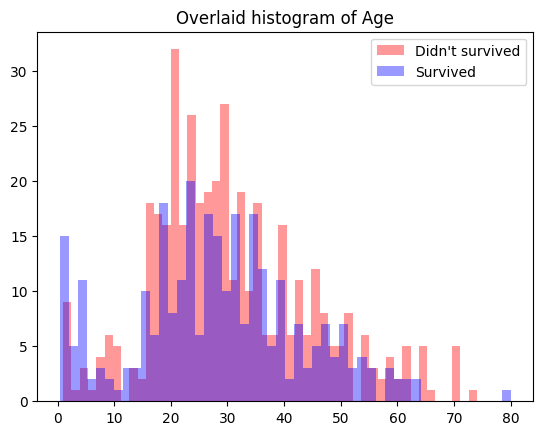

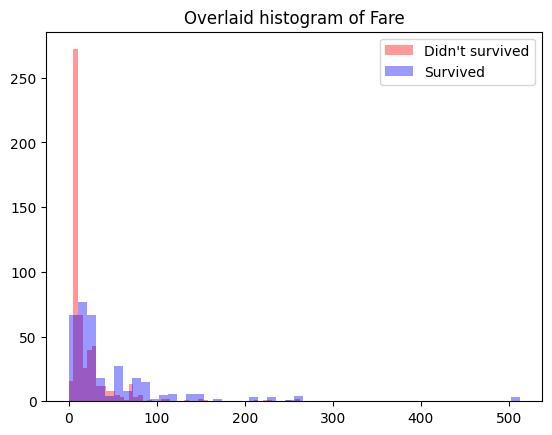

In [8]:
for i in ['Age','Fare']:
    survived = list(raw_df[raw_df['Survived']==1][i].dropna())
    died = list(raw_df[raw_df['Survived']==0][i].dropna())
    sns.distplot(died,color='red',kde=False, bins=50)
    sns.distplot(survived,color='blue', kde=False,bins=50)
    plt.legend(["Didn't survived","Survived"])
    plt.title('Overlaid histogram of {}' .format(i))
    plt.show()

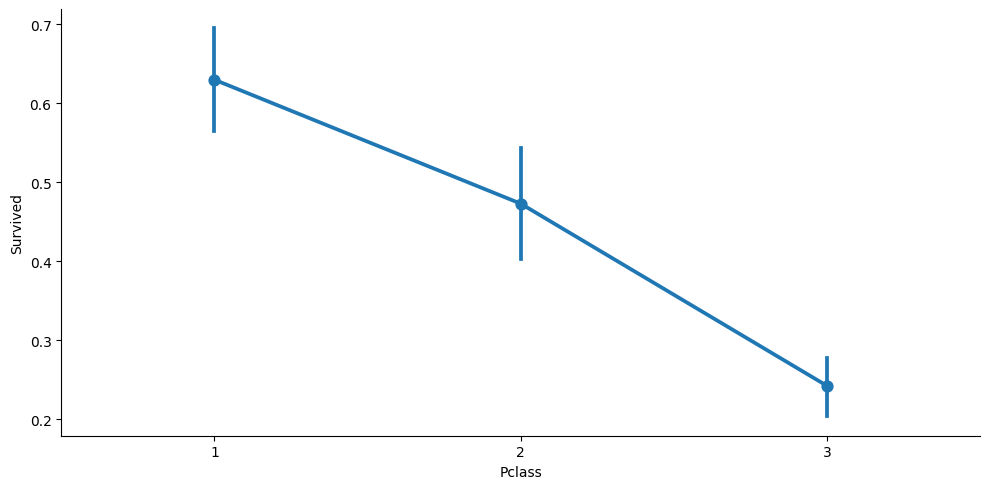

<Figure size 640x480 with 0 Axes>

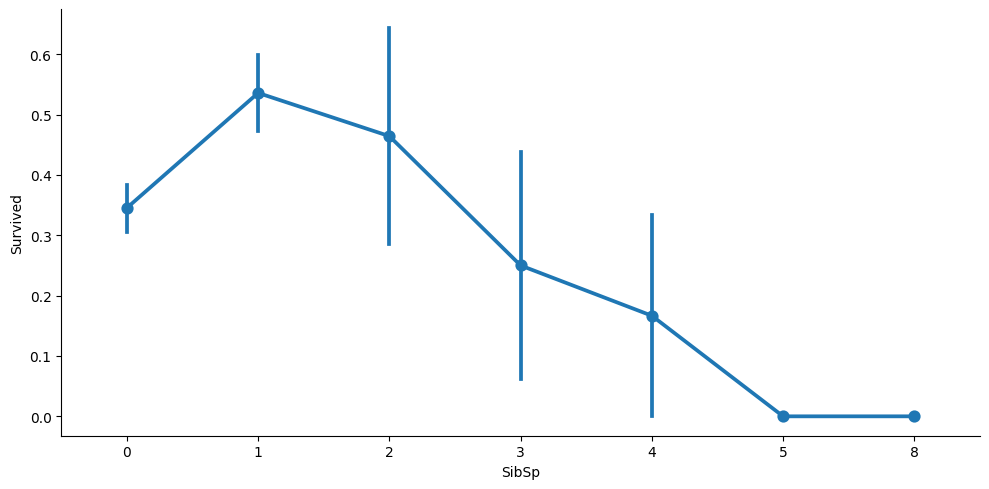

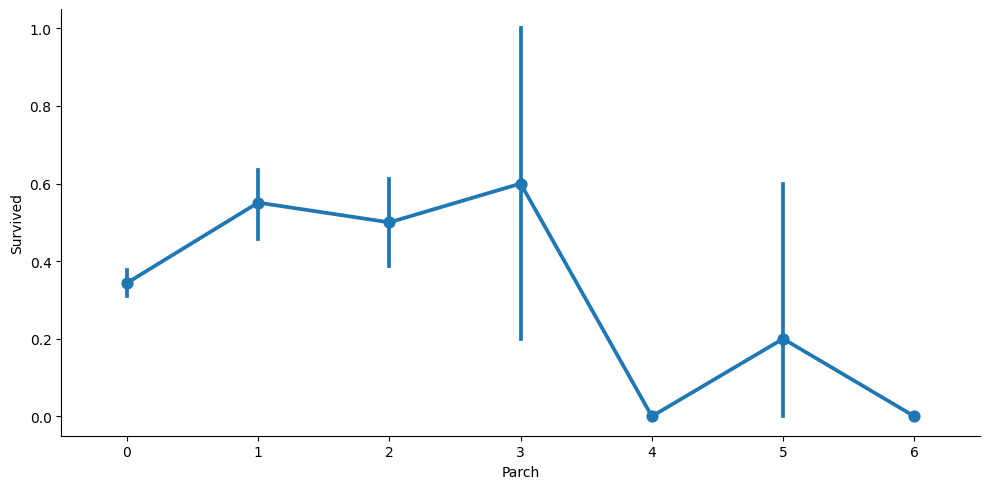

<Figure size 640x480 with 0 Axes>

In [9]:
for i, col in enumerate(['Pclass','SibSp','Parch']):
    
    sns.catplot(x=col,y=raw_df['Survived'],data=raw_df,kind="point",aspect=2)
    plt.figure(i)
    plt.show()

In [10]:
raw_df['Family_cnt'] = raw_df['Parch'] + raw_df['SibSp']

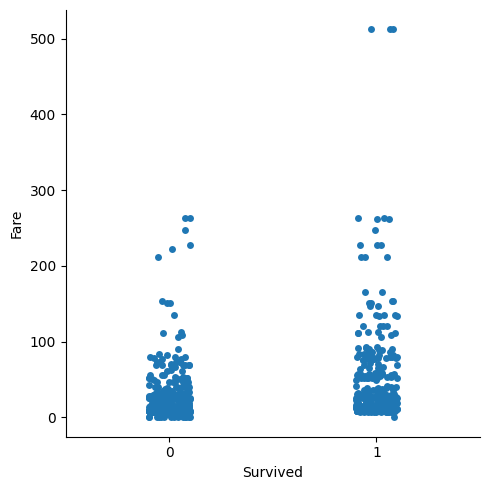

In [11]:
sns.catplot(x=raw_df['Survived'],y=raw_df['Fare'],data=raw_df,kind='strip')

<Axes: >

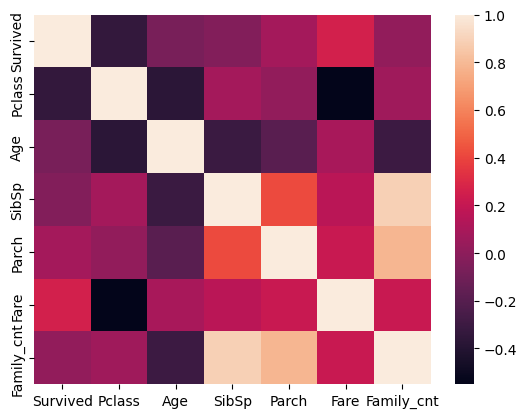

In [12]:
sns.heatmap(raw_df.corr())

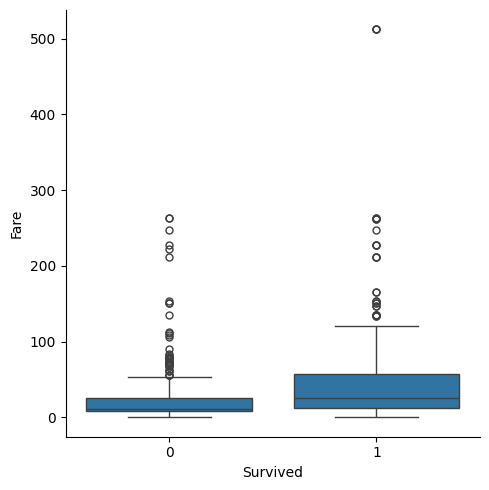

In [13]:
sns.catplot(x=raw_df['Survived'],y=raw_df['Fare'],data=raw_df,kind='box')

In [14]:
raw_df.groupby(raw_df['Age'].isna()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_cnt
Age,,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.943978
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.745763


In [15]:
raw_df['Age'].isna().mean()

0.19865319865319866

In [16]:
raw_df['Age'].fillna(raw_df['Age'].mean(),inplace=True)
raw_df.isna().sum()


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Family_cnt    0
dtype: int64

In [17]:
raw_df['Age'].sum()

26461.91382352941